# Analysis of engagement on Tweets

In this example, I'm going to use a dataset that contains real data compiled from Twitter about tweets made, related to New Year's resolutions. The analysis will be similar to the scenario presented in coursera.
- What is the dataset about?The data shows information about various tweets made during the New Year of 2015. The tweets are about New Year resolutions. There are many fields in the dataset, such as 'Resolution Category', 'gender', 'tweet recount', 'tweet id',  'region', etc., among others.
- Where does the data come from? The data can be found at https://data.world/crowdflower/2015-new-years-resolutions shared by user @crowdflower
- What is the purpose of these analysis? What insight am I trying to get? What question is this report responding?We are trying to recreate the scenario followed in the Coursera activity, in which we are trying to help clients optimize their social media strategy and increase their reach and engagement. We are using a real dataset mixed with some that was randomly generated. For this, we'll assume the following assumptions for the purpose of this exercise: <br>
    - The dataset counts with a column of values that indicate the number of likes in that tweet( the original dataset doesn't have this, so we are adding it).    
    - We are going to assume this dataset is made of tweets that were gathered before, and the client is looking for new insight (we make this assumption because the results may be skewed to a certain type of tweet based on the nature of the same dataset).

In [30]:
#Number 1: Import required libraries
#Pandas, Numpy, Matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

# this is, so graphs show after the line of code
%matplotlib inline 

In [31]:
#Number 3:  Load the data into a Pandas DataFrame and Explore the data
data = pd.read_csv('New-years-resolutions-DFE.csv', encoding='latin-1')
tweets = pd.DataFrame(data)
#we add a column of likes since these dataset doesn't have any
tweets.insert(6,'Likes',np.random.randint(0, 100000, size=5011),True)
tweets.head()

,other_topic,resolution_topics,gender,name,Resolution_Category,retweet_count,Likes,text,tweet_coord,tweet_created,tweet_date,tweet_id,tweet_location,tweet_state,user_timezone,tweet_region
0,"Read moore books, read less facebook.",Eat healthier,female,Dena_Marina,Health & Fitness,0.0,76656,"#NewYearsResolution :: Read more books, No scr...",NaN,12/31/14 10:48,12/31/14,5.503630e+17,Southern California,CA,Pacific Time (US & Canada),West
1,NaN,Humor about Personal Growth and Interests Reso...,female,ninjagirl325,Humor,1.0,16404,#NewYearsResolution Finally master @ZJ10 's pa...,NaN,12/31/14 10:47,12/31/14,5.503630e+17,New Jersey,NJ,Central Time (US & Canada),Northeast
2,NaN,Be More Confident,male,RickyDelReyy,Personal Growth,0.0,31006,#NewYearsResolution to stop being so damn perf...,NaN,12/31/14 10:46,12/31/14,5.503620e+17,Hollywood,CA,Eastern Time (US & Canada),West
3,Help More\nspread pet therapy|helping other,Other,male,CalmareNJ,Philanthropic,0.0,67594,My #NewYearsResolution is to help my disabled ...,NaN,12/31/14 10:45,12/31/14,5.503620e+17,Metro NYC,NY,NaN,Northeast
4,NaN,Be more positive,female,welovatoyoudemi,Personal Growth,0.0,66896,#NewYearsResolution #2015Goals #2015bucketlist...,NaN,12/31/14 10:44,12/31/14,5.503620e+17,"Pittsburgh, Pennsylvania",PA,Eastern Time (US & Canada),Northeast


* As mentioned before, we have to create a column that indicates the number of likes for each category, for the purpose of this exercise.

In [32]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   other_topic          1364 non-null   object 
 1   resolution_topics    5011 non-null   object 
 2   gender               5011 non-null   object 
 3   name                 5011 non-null   object 
 4   Resolution_Category  5011 non-null   object 
 5   retweet_count        3139 non-null   float64
 6   Likes                5011 non-null   int32  
 7   text                 5011 non-null   object 
 8   tweet_coord          227 non-null    object 
 9   tweet_created        5011 non-null   object 
 10  tweet_date           5011 non-null   object 
 11  tweet_id             5011 non-null   float64
 12  tweet_location       5011 non-null   object 
 13  tweet_state          5011 non-null   object 
 14  user_timezone        3709 non-null   object 
 15  tweet_region         5011 non-null   o

In [33]:
tweets.describe()

,retweet_count,Likes,tweet_id
count,3139.000000,5011.000000,5.011000e+03
mean,4.482956,50233.923568,5.500693e+17
std,90.199637,28784.306666,8.874261e+14
min,0.000000,31.000000,5.468200e+17
25%,0.000000,25869.500000,5.497270e+17
50%,0.000000,49984.000000,5.503850e+17
75%,1.000000,75281.500000,5.506860e+17
max,4234.000000,99963.000000,5.510740e+17


In [34]:
#We print the amount data for each resolution category
tweets.value_counts('Resolution_Category')

Resolution_Category
Personal Growth                 1781
Humor                           1010
Health & Fitness                 840
Recreation & Leisure             467
Family/Friends/Relationships     351
Finance                          176
Career                           126
Education/Training                89
Time Management/Organization      87
Philanthropic                     84
dtype: int64

In [35]:
#Number 4: Cleaning the data
#we first drop the columns that have the most amount of NaN or those that doesn't interest us
tweets = tweets.drop('other_topic', axis=1)
tweets = tweets.drop('tweet_coord', axis=1)
tweets = tweets.drop('user_timezone', axis=1)

We drop certain information that is not going to be useful to us or increases the difficulty of the analysis, such as the 'Other topic' column. This way we can clean the dataset for better use. 

In [8]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   resolution_topics    5011 non-null   object 
 1   gender               5011 non-null   object 
 2   name                 5011 non-null   object 
 3   Resolution_Category  5011 non-null   object 
 4   retweet_count        3139 non-null   float64
 5   Likes                5011 non-null   int32  
 6   text                 5011 non-null   object 
 7   tweet_created        5011 non-null   object 
 8   tweet_date           5011 non-null   object 
 9   tweet_id             5011 non-null   float64
 10  tweet_location       5011 non-null   object 
 11  tweet_state          5011 non-null   object 
 12  tweet_region         5011 non-null   object 
dtypes: float64(2), int32(1), object(10)
memory usage: 489.5+ KB


In [9]:
#Number 4: Cleaning the data
#we drop the rest of the columns that have missing values
tweets.dropna(inplace = True)
tweets.drop_duplicates(inplace = True)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3139 entries, 0 to 3138
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   resolution_topics    3139 non-null   object 
 1   gender               3139 non-null   object 
 2   name                 3139 non-null   object 
 3   Resolution_Category  3139 non-null   object 
 4   retweet_count        3139 non-null   float64
 5   Likes                3139 non-null   int32  
 6   text                 3139 non-null   object 
 7   tweet_created        3139 non-null   object 
 8   tweet_date           3139 non-null   object 
 9   tweet_id             3139 non-null   float64
 10  tweet_location       3139 non-null   object 
 11  tweet_state          3139 non-null   object 
 12  tweet_region         3139 non-null   object 
dtypes: float64(2), int32(1), object(10)
memory usage: 331.1+ KB


We analyze the number of non-null values, and drop those that exist to clean further the data.

In [10]:
#we transform the corresponding values to the correct data type
pd.to_datetime(tweets['tweet_date'])
pd.to_datetime(tweets['tweet_created'])

0      2014-12-31 10:48:00
1      2014-12-31 10:47:00
2      2014-12-31 10:46:00
3      2014-12-31 10:45:00
4      2014-12-31 10:44:00
               ...        
3134   2015-01-02 07:07:00
3135   2015-01-02 07:07:00
3136   2015-01-02 07:07:00
3137   2015-01-02 07:06:00
3138   2015-01-02 07:06:00
Name: tweet_created, Length: 3139, dtype: datetime64[ns]

We transform the values that need to be transform to the the correct data type.

In [11]:
tweets.info()
tweets.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3139 entries, 0 to 3138
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   resolution_topics    3139 non-null   object 
 1   gender               3139 non-null   object 
 2   name                 3139 non-null   object 
 3   Resolution_Category  3139 non-null   object 
 4   retweet_count        3139 non-null   float64
 5   Likes                3139 non-null   int32  
 6   text                 3139 non-null   object 
 7   tweet_created        3139 non-null   object 
 8   tweet_date           3139 non-null   object 
 9   tweet_id             3139 non-null   float64
 10  tweet_location       3139 non-null   object 
 11  tweet_state          3139 non-null   object 
 12  tweet_region         3139 non-null   object 
dtypes: float64(2), int32(1), object(10)
memory usage: 331.1+ KB


,resolution_topics,gender,name,Resolution_Category,retweet_count,Likes,text,tweet_created,tweet_date,tweet_id,tweet_location,tweet_state,tweet_region
0,Eat healthier,female,Dena_Marina,Health & Fitness,0.0,22015,"#NewYearsResolution :: Read more books, No scr...",12/31/14 10:48,12/31/14,5.503630e+17,Southern California,CA,West
1,Humor about Personal Growth and Interests Reso...,female,ninjagirl325,Humor,1.0,15940,#NewYearsResolution Finally master @ZJ10 's pa...,12/31/14 10:47,12/31/14,5.503630e+17,New Jersey,NJ,Northeast
2,Be More Confident,male,RickyDelReyy,Personal Growth,0.0,49371,#NewYearsResolution to stop being so damn perf...,12/31/14 10:46,12/31/14,5.503620e+17,Hollywood,CA,West
3,Other,male,CalmareNJ,Philanthropic,0.0,11049,My #NewYearsResolution is to help my disabled ...,12/31/14 10:45,12/31/14,5.503620e+17,Metro NYC,NY,Northeast
4,Be more positive,female,welovatoyoudemi,Personal Growth,0.0,74881,#NewYearsResolution #2015Goals #2015bucketlist...,12/31/14 10:44,12/31/14,5.503620e+17,"Pittsburgh, Pennsylvania",PA,Northeast


In [12]:
#Number 5: Visualize and Analyze the data
#entries by resolution category
print(tweets.value_counts('Resolution_Category'))

Resolution_Category
Personal Growth                 1120
Humor                            677
Health & Fitness                 497
Recreation & Leisure             316
Family/Friends/Relationships     230
Finance                           86
Career                            70
Education/Training                52
Philanthropic                     46
Time Management/Organization      45
dtype: int64


We give a look a the cleaned data, we noticed how many tweets are for each category.

In [13]:
#entries by tweet region
print(tweets.value_counts('tweet_region'))

tweet_region
South        998
West         804
Midwest      670
Northeast    667
dtype: int64


We also check by region.

<Axes: xlabel='Likes', ylabel='Count'>

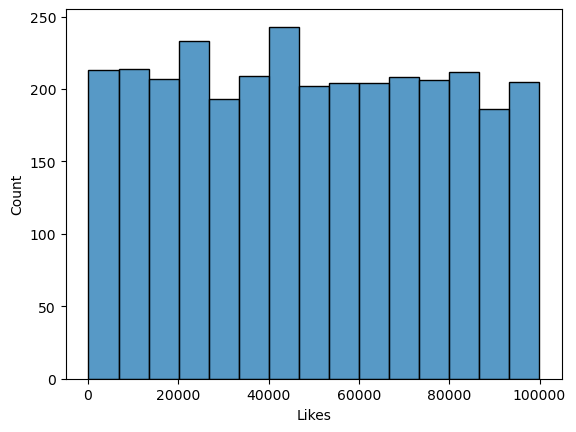

In [14]:
# visualize the data:
#ranges of likes
sns.histplot(tweets['Likes'])

We give a look a the range of likes, most of them are between 40,000 and 60,000 likes.

male      1626
female    1513
Name: gender, dtype: int64


([<matplotlib.patches.Wedge at 0x176b01de4d0>,
 [Text(-0.06216814881704969, 1.0982418318715879, 'Males'),
  Text(0.06216814881704907, -1.098241831871588, 'Females')],
 [Text(-0.03390989935475437, 0.5990409992026843, '52%'),
  Text(0.03390989935475403, -0.5990409992026844, '48%')])

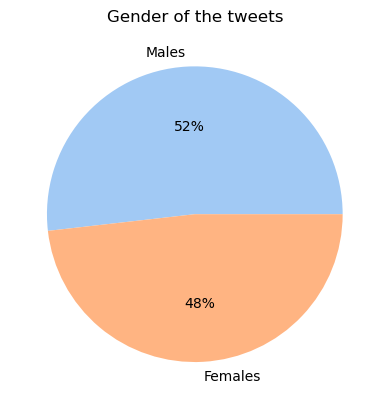

In [15]:
#percentages of gender 
count = tweets['gender'].value_counts()
print(count)
values = [(count[i]/count.sum())*100 for i in range(0,len(count))]
labels = ['Males','Females']

plt.title("Gender of the tweets")
colors = sns.color_palette('pastel')[0:5]
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')

We can see the gender of the client's public: it is mostly male, but the difference is negligible.

South        998
West         804
Midwest      670
Northeast    667
Name: tweet_region, dtype: int64


([<matplotlib.patches.Wedge at 0x176b644b5d0>,
 [Text(0.5954203852855439, 0.9249186800937771, 'South'),
  Text(-1.0372939650595117, 0.3660891012460172, 'West'),
  Text(-0.46341075775038254, -0.9976224083295324, 'Midwest'),
  Text(0.863874114665465, -0.680971008201494, 'Northeast')],
 [Text(0.3247747556102966, 0.5045010982329693, '32%'),
  Text(-0.5657967082142791, 0.19968496431600935, '26%'),
  Text(-0.25276950422748135, -0.544157677270654, '21%'),
  Text(0.4712040625447991, -0.3714387317462694, '21%')])

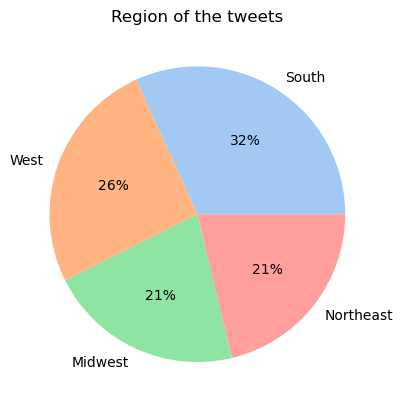

In [16]:
#porcentages of tweets by each region
count = tweets['tweet_region'].value_counts()
print(count)
values = [(count[i]/count.sum())*100 for i in range(0,len(count))]
labels = ['South','West','Midwest','Northeast']

plt.title("Region of the tweets")
colors = sns.color_palette('pastel')[0:5]
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')

We can see the location of the client's public: it is mostly in the South and West.

Personal Growth                 1120
Humor                            677
Health & Fitness                 497
Recreation & Leisure             316
Family/Friends/Relationships     230
Finance                           86
Career                            70
Education/Training                52
Philanthropic                     46
Time Management/Organization      45
Name: Resolution_Category, dtype: int64


([<matplotlib.patches.Wedge at 0x176b64ab950>,
 [Text(0.4783345389266708, 0.990553415455123, 'Personal Growth'),
  Text(-1.0729605366604418, 0.24239572349638733, 'Humor'),
  Text(-0.6373557484131415, -0.8965364744195992, 'Health & Fitness'),
  Text(0.21385710344841485, -1.0790111859033966, 'Recreation & Leisure'),
  Text(0.7434311202545035, -0.8107466740216294, 'Family/Friends/Relationships'),
  Text(0.9587151362678855, -0.5393192815863808, 'Finance'),
  Text(1.0309155514095591, -0.38368362730500366, 'Career'),
  Text(1.069972086935075, -0.25526404599904085, 'Education/Training'),
  Text(1.0898261309285593, -0.14926153002460688, 'Philanthropic'),
  Text(1.0988846049448713, -0.049523984241521955, 'Time Management/Organization')],
 [Text(0.3478796646739424, 0.7204024839673622, '36%'),
  Text(-0.7803349357530486, 0.1762877989064635, '22%'),
  Text(-0.46353145339137564, -0.6520265268506176, '16%'),
  Text(0.15553243887157442, -0.784735407929743, '10%'),
  Text(0.5406771783669116, -0.589633

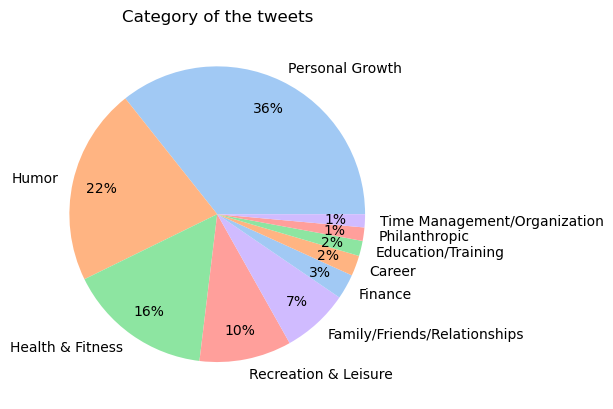

In [17]:
#categories by percentages
count = tweets['Resolution_Category'].value_counts()
#print(count)
values = [(count[i]/count.sum())*100 for i in range(0,len(count))]
labels = ['Personal Growth','Humor','Health & Fitness','Recreation & Leisure','Family/Friends/Relationships','Finance','Career','Education/Training','Philanthropic','Time Management/Organization']

plt.title("Category of the tweets")
colors = sns.color_palette('pastel')[0:5]
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%', pctdistance=0.8)

We can see the types of tweets the client has made so far: it is mostly about Personal Growth.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Health & Fitness'),
  Text(1, 0, 'Humor'),
  Text(2, 0, 'Personal Growth'),
  Text(3, 0, 'Philanthropic'),
  Text(4, 0, 'Recreation & Leisure'),
  Text(5, 0, 'Family/Friends/Relationships'),
  Text(6, 0, 'Career'),
  Text(7, 0, 'Finance'),
  Text(8, 0, 'Education/Training'),
  Text(9, 0, 'Time Management/Organization')])

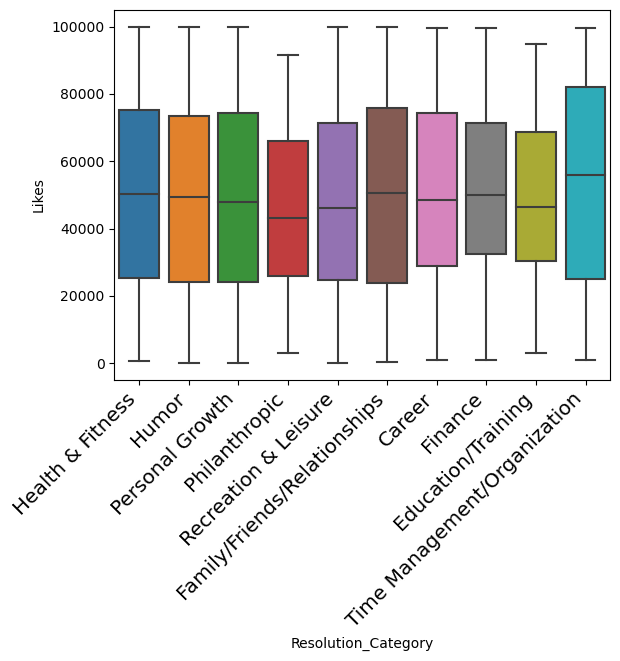

In [19]:
# likes by category
sns.boxplot(x=tweets['Resolution_Category'], y =tweets['Likes'])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

We can see the number of likes in general, by each category.

In [23]:
#create two datasets for only males and only females
tweets_males = tweets[tweets['gender'] == 'male']
tweets_males.head()

,resolution_topics,gender,name,Resolution_Category,retweet_count,Likes,text,tweet_created,tweet_date,tweet_id,tweet_location,tweet_state,tweet_region
2,Be More Confident,male,RickyDelReyy,Personal Growth,0.0,49371,#NewYearsResolution to stop being so damn perf...,12/31/14 10:46,12/31/14,5.503620e+17,Hollywood,CA,West
3,Other,male,CalmareNJ,Philanthropic,0.0,11049,My #NewYearsResolution is to help my disabled ...,12/31/14 10:45,12/31/14,5.503620e+17,Metro NYC,NY,Northeast
5,Eat healthier,male,EthanJMoroles,Health & Fitness,0.0,64405,#NewYearsResolution 1. Eat less.\n2.quit lying.,12/31/14 10:43,12/31/14,5.503620e+17,Odessa Texas.,TX,South
6,Take a cross country trip,male,jon__bay,Recreation & Leisure,0.0,87171,My #NewYearsResolution \n\n-Learn how to drive...,12/31/14 10:42,12/31/14,5.503610e+17,"Santa Cruz, CA",CA,West
7,Humor about New Years,male,freckleface_kev,Humor,0.0,59948,ÛÏ@Becca3129 #NewYearsResolution #ForReal #Th...,12/31/14 10:41,12/31/14,5.503610e+17,North Carolina,NC,South


In [24]:
tweets_females = tweets[tweets['gender'] == 'female']
tweets_females.head()

,resolution_topics,gender,name,Resolution_Category,retweet_count,Likes,text,tweet_created,tweet_date,tweet_id,tweet_location,tweet_state,tweet_region
0,Eat healthier,female,Dena_Marina,Health & Fitness,0.0,22015,"#NewYearsResolution :: Read more books, No scr...",12/31/14 10:48,12/31/14,5.503630e+17,Southern California,CA,West
1,Humor about Personal Growth and Interests Reso...,female,ninjagirl325,Humor,1.0,15940,#NewYearsResolution Finally master @ZJ10 's pa...,12/31/14 10:47,12/31/14,5.503630e+17,New Jersey,NJ,Northeast
4,Be more positive,female,welovatoyoudemi,Personal Growth,0.0,74881,#NewYearsResolution #2015Goals #2015bucketlist...,12/31/14 10:44,12/31/14,5.503620e+17,"Pittsburgh, Pennsylvania",PA,Northeast
12,Eat healthier,female,scandalwomen,Health & Fitness,1.0,34204,RT @colonsuzan: Easy #NewYearsResolution: Stan...,12/31/14 10:38,12/31/14,5.503600e+17,New York,NY,Northeast
13,Be more positive,female,vtorres0811,Personal Growth,0.0,9458,@Inc @MarlaTabaka YES - let's all take calcula...,12/31/14 10:37,12/31/14,5.503600e+17,"New York, NY",NY,Northeast


To continue the analysis, we need to separate the dataset by gender.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Personal Growth'),
  Text(1, 0, 'Philanthropic'),
  Text(2, 0, 'Health & Fitness'),
  Text(3, 0, 'Recreation & Leisure'),
  Text(4, 0, 'Humor'),
  Text(5, 0, 'Family/Friends/Relationships'),
  Text(6, 0, 'Career'),
  Text(7, 0, 'Education/Training'),
  Text(8, 0, 'Time Management/Organization'),
  Text(9, 0, 'Finance')])

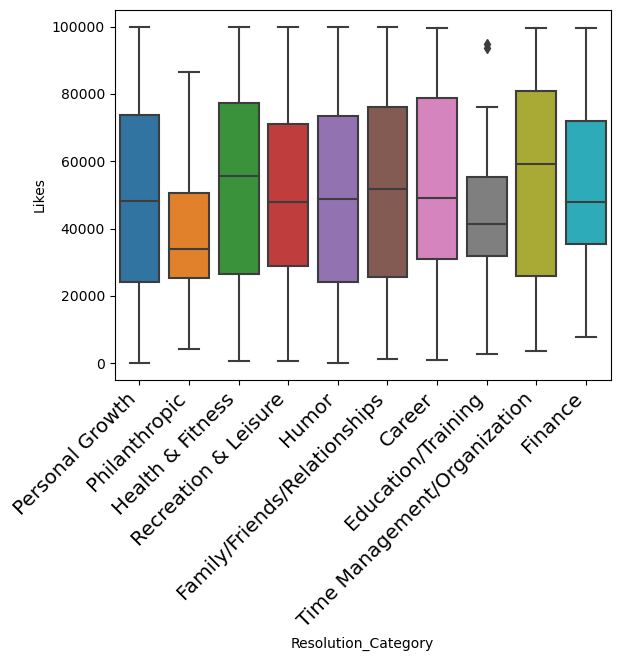

In [25]:
#likes by category (only males)
sns.boxplot(x=tweets_males['Resolution_Category'], y =tweets_males['Likes'])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

We can see the number of likes by the male public, by each category.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Health & Fitness'),
  Text(1, 0, 'Humor'),
  Text(2, 0, 'Personal Growth'),
  Text(3, 0, 'Recreation & Leisure'),
  Text(4, 0, 'Career'),
  Text(5, 0, 'Family/Friends/Relationships'),
  Text(6, 0, 'Finance'),
  Text(7, 0, 'Education/Training'),
  Text(8, 0, 'Time Management/Organization'),
  Text(9, 0, 'Philanthropic')])

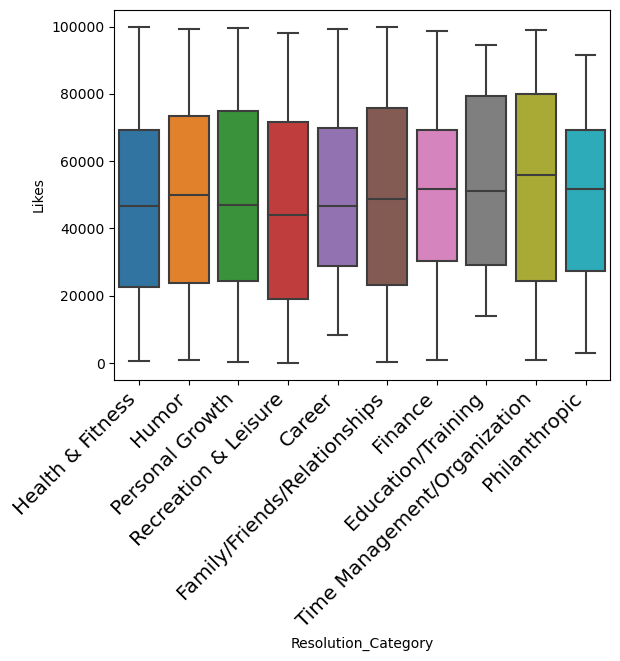

In [26]:
#likes by category (only females)
sns.boxplot(x=tweets_females['Resolution_Category'], y =tweets_females['Likes'])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

We can see the number of likes by the female public, by each category.

# Conclusions:<br>
Analyzing the graphs, we can gather the following conclusions:
- There were slightly more males (52%) than females (48%) in the tweets used.
- The majority of the tweets came from the south region (32%) and the west region(26%).
- Most of the tweets were part of the 'Personal Growth' type (36%); the second and third most common types were 'Humor', and 'Health and Fitness', respectively.
- The categories that received the most likes were 'Time Management/Organization', 'Family/Friends/Relationships', and 'Health & Fitness'.- 'Health and Fitness' and 'Time Management/Organization' were the most liked categories by males.
- 'Humor' and 'Time Management/Organization' were the most liked tweets by females.
- Despite 'Personal Growth' being the most common type of tweet, the most liked type by the general public was 'Management/Organization', so:    
    - We recommend to our client to focus their efforts on producing more tweets related to time management and organization, as well as topics related to health and fitness and humor.    
    - The client shouldn't focus too much on appealing to a specific gender because, while the majority of the public is male, the difference is not noticeable.    
    - Most of the public of the client is located in the West and South regions of the country, so focusing on topics related to those places is encouraged.